# Predicting heart disease using machine learning

This project looks at using Python machine learning libraries to create a system that can diagnose heart disease based on medical attributes. 

We will take the following steps
1. Define the problem
2. Look at the data
3. Evaluation
4. Examine the features
5. Create models
6. Experiment with models. 

Column Descriptions:

    id (Unique id for each patient)
    age (Age of the patient in years)
    origin (place of study)
    sex (Male/Female)
    cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
    trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
    chol (serum cholesterol in mg/dl)
    fbs (if fasting blood sugar > 120 mg/dl)
    restecg (resting electrocardiographic results)
    -- Values: [normal, stt abnormality, lv hypertrophy]
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (True/ False)
    oldpeak: ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    ca: number of major vessels (0-3) colored by fluoroscopy
    thal: [normal; fixed defect; reversible defect]
    num: the predicted attribute


In [62]:
#Import needed tools
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 
from sklearn import metrics

In [63]:
#Loading the data and getting the shape
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
#Looking at basic summary statistics for the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [66]:
#Checking number of NaN values in data, there are none
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [67]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [68]:
#More males then females
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [69]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


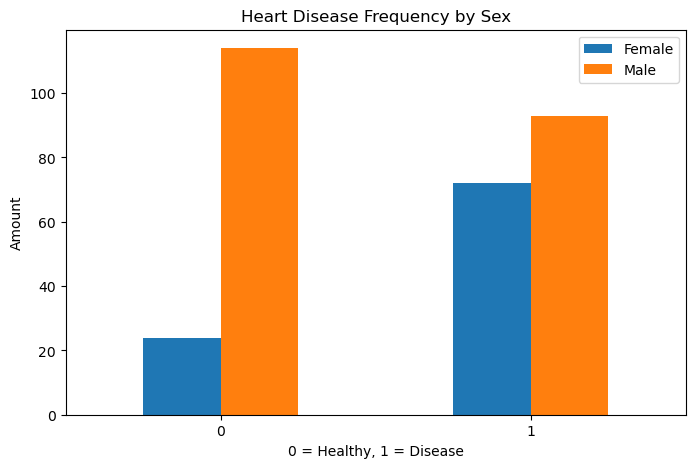

In [70]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",
                                        figsize=(8,5))
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = Healthy, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

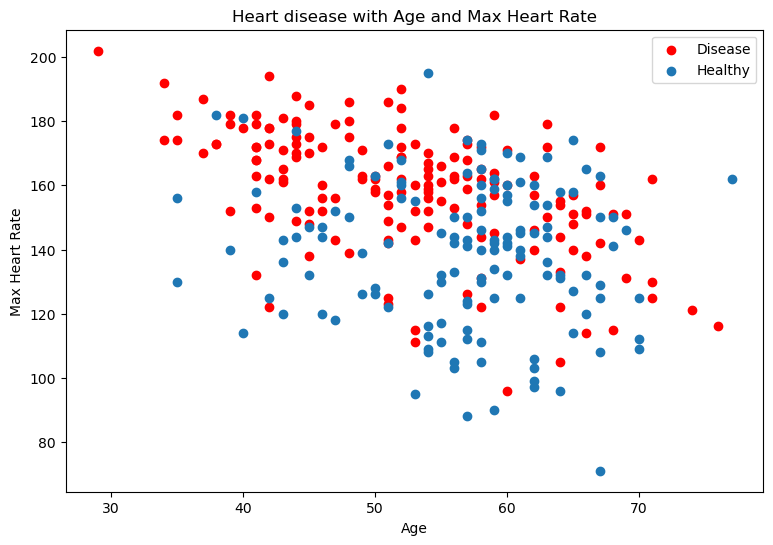

In [71]:
#Age vs Max heart rate for heart disease
plt.figure(figsize=(9,6))
#Scatterplot with positive examples
plt.scatter(df["age"][df["target"]==1],
           df["thalach"][df["target"]==1],
           color="red")
#Scatterplot with negative examples
plt.scatter(df["age"][df["target"]==0],
           df["thalach"][df["target"]==0])

#
plt.title("Heart disease with Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "Healthy"])

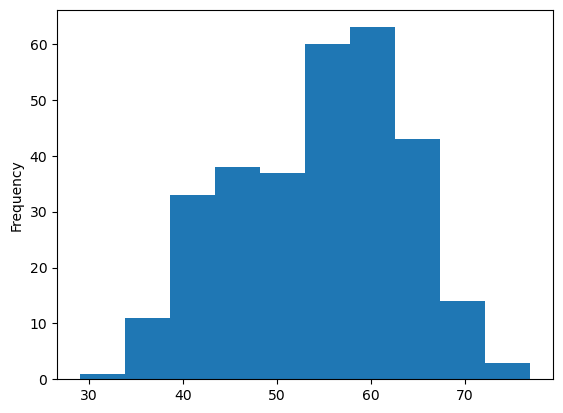

In [72]:
df["age"].plot.hist();

In [73]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

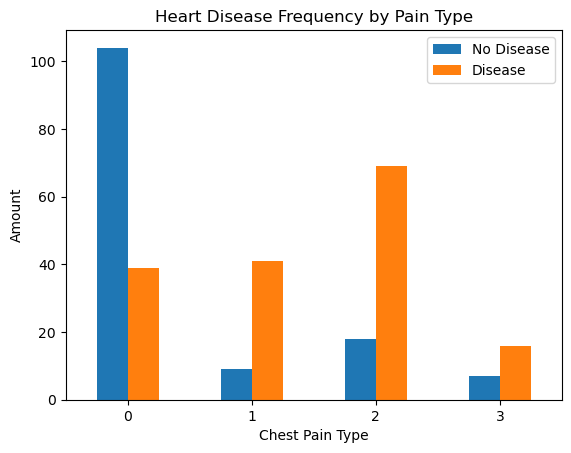

In [74]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar")

plt.title("Heart Disease Frequency by Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

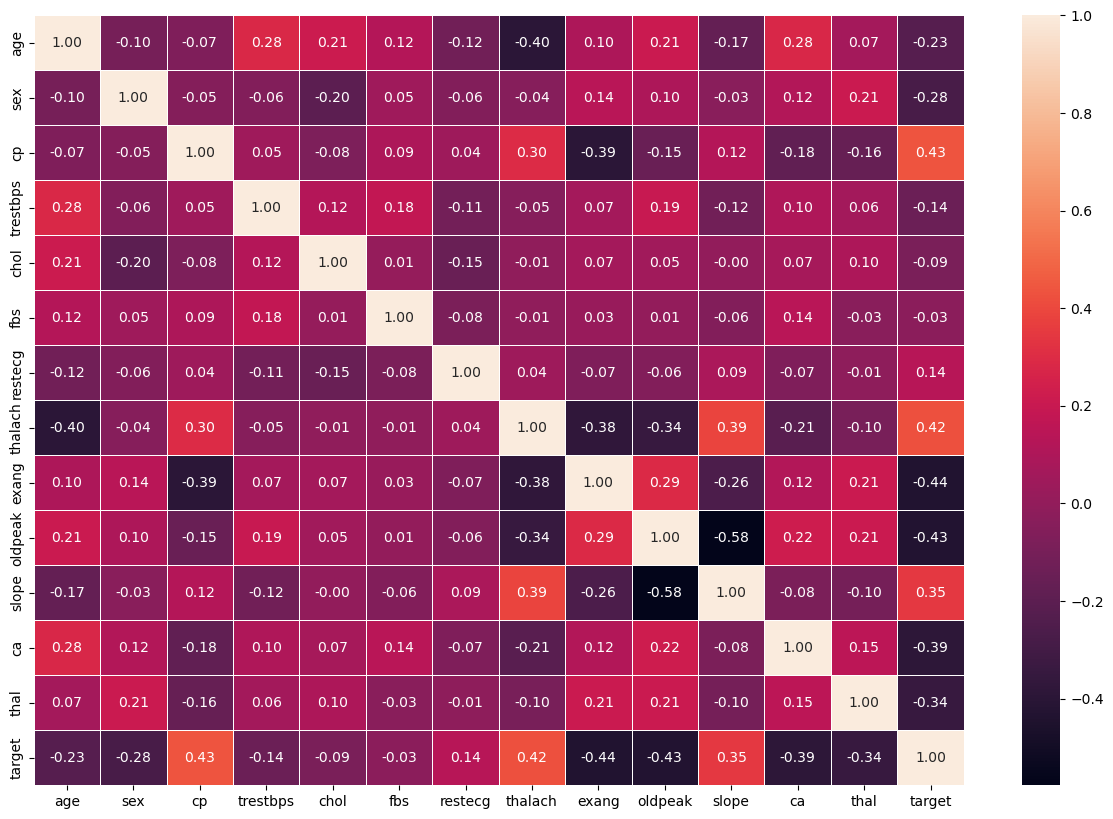

In [75]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=.5,
                fmt=".2f")

## Creating Models


In [76]:
X = df.drop(["target"],axis=1)
y = df["target"]

In [77]:
np.random.seed(42)

#Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

 Now we will try 3 different machine learning models
 
 1. Logistic Regression
 2. K-Nearest Neighbors Classifier
 3. Random Forest Classifier

In [78]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}
#Making a function to score all the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates different machine learning models
    models: a dictionary of different Scikit-Learn models
    """
    #Setting random seed
    np.random.seed(42)
    #Dictionary to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        #Evaluate model and add score to model_scores dict
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [79]:
#Calling above function on our data
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

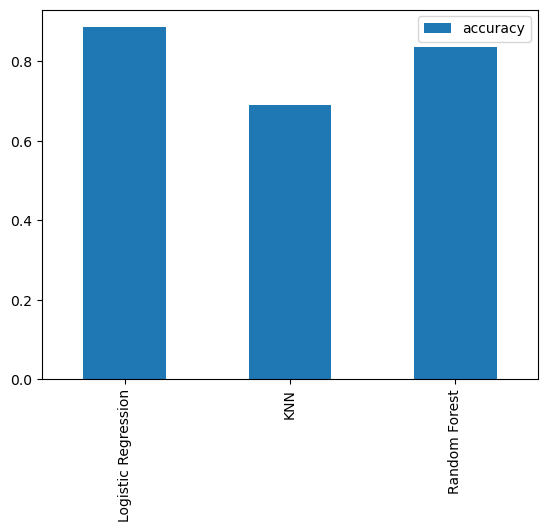

In [80]:
model_comparison = pd.DataFrame(model_scores, index = ["accuracy"])
model_comparison.T.plot.bar();

We now have some baseline models with some basic metrics.  The problem here is disease detection so accuracy is not the best metric to judge the quality of our models. Later we will be using recall to evaluate the models but for now we will continue to use accuracy and then make adjustments later.  

We will also begin tuning the models to improve performance

In [81]:
#Tuning the KNN model

train_scores = []
test_scores = []

#making a list of different values for n_neighbors
neighbors = range(1,21)

#Setting up KNN model
knn= KNeighborsClassifier()

#Looping though neighbors list
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [82]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [83]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on test data: 75.41%


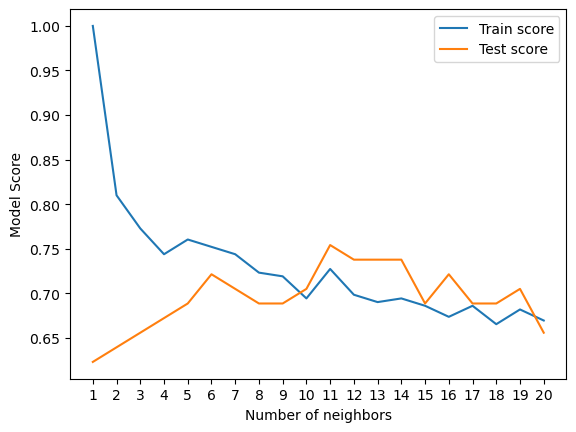

In [84]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1,21,1))
plt.legend()
print(f"Max KNN score on test data: {max(test_scores)*100:.2f}%")

### Hyperparamater tuning with RandomizedSearchCV

In [85]:
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver": ["liblinear"]}
#Creating hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,50),
          "max_depth":[None, 3,5, 10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [86]:
#setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter = 20, 
                               verbose=True)

#fit random hyperparameter model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [87]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [88]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we are going to tune the Random Forest

In [89]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter = 20,
                           verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [90]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_depth': 3}

In [91]:
#Slight improvement from baseline
rs_rf.score(X_test, y_test)

0.8688524590163934

### Tuning with GridSearch

Now we will attempt to improve our models with GridSearchCV instead of RandomizedSearchCV

In [92]:

log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver" : ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True,
                         scoring = "recall")

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='recall', verbose=True)

In [93]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [94]:
gs_log_reg.score(X_test, y_test)

0.90625

### Evaluating models

In [95]:
#Make predictions with model
y_preds = gs_log_reg.predict(X_test)

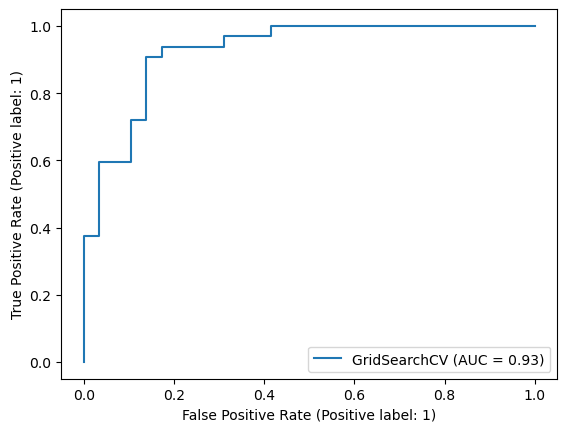

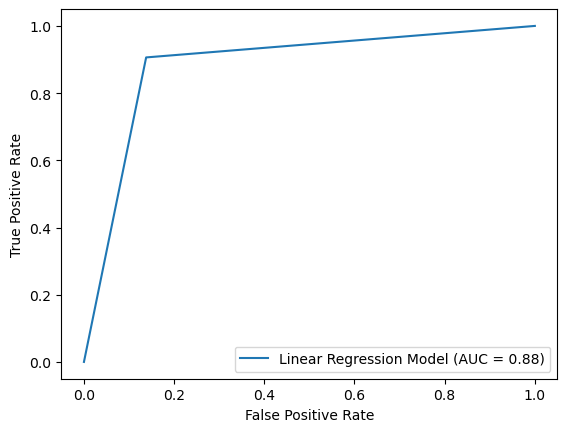

In [98]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
display.plot()


In [97]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


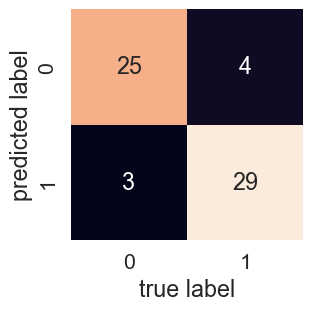

In [100]:
sns.set(font_scale=1.4)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [101]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [104]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [105]:
clf = LogisticRegression(C = gs_log_reg.best_params_["C"],
                        solver = gs_log_reg.best_params_["solver"])

In [109]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [110]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [111]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8207936507936507

In [112]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9212121212121213

In [113]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8673007976269721

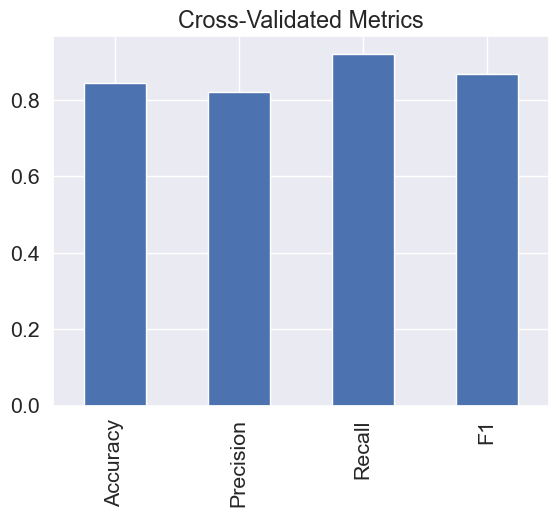

In [114]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [115]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [116]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [117]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

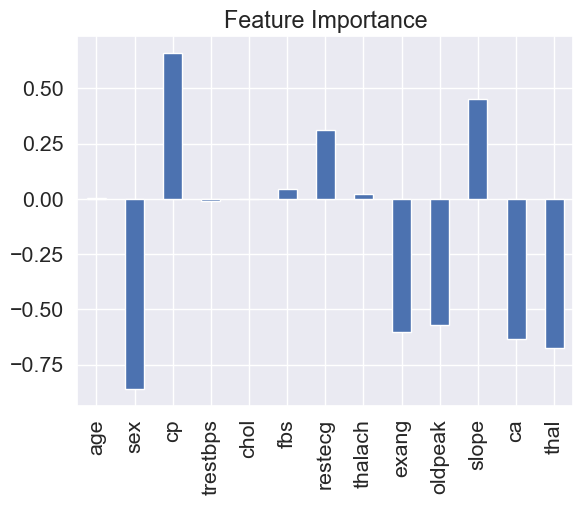

In [118]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [119]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [120]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
